In [26]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
# Retina display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from latexify import latexify, format_axes

MakeMoons Dataset

In [27]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

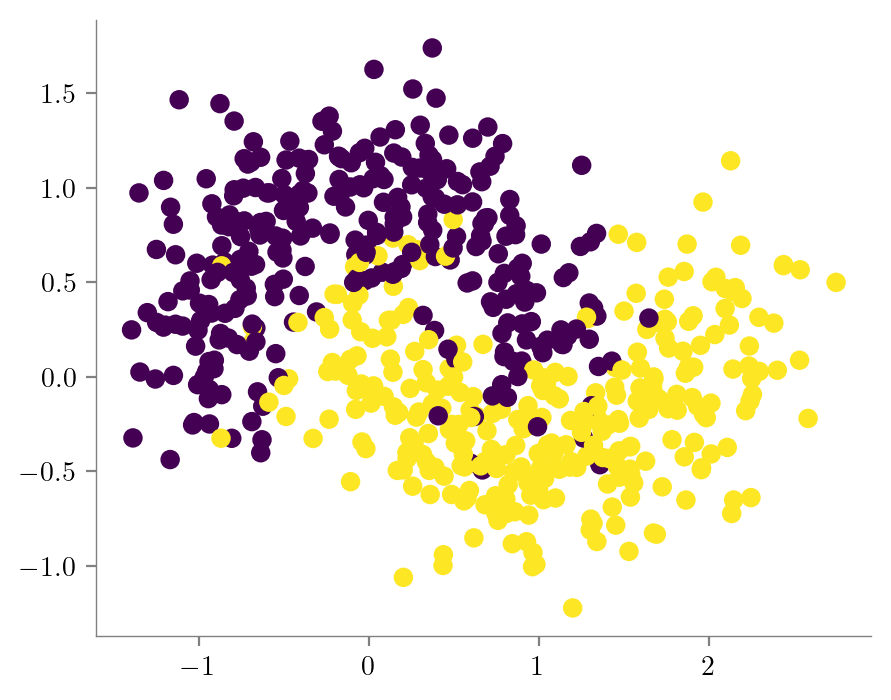

In [28]:
latexify(fig_width=5, fig_height=4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Train') 
format_axes(plt.gca())
plt.show()

In [29]:
#Define the hyperparameters' possible values
max_depth_values = [1,2,3,4,5,6,7,8,9,10]
min_samples_split_values = [2,3,4,5,6,7,8]
criteria_values = ['gini', 'entropy']

Nested For Loops

In [30]:
best_accuracy = 0
best_params = {}

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for criterion in criteria_values:
            # Define the Decision Tree Classifier
            dt_classifier = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                criterion=criterion,
                random_state=42
            )
            dt_classifier.fit(X_train, y_train)
            
            # Evaluate on the validation set
            val_accuracy = dt_classifier.score(X_val, y_val)
            
            # Check if this combination gives a better accuracy
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'criterion': criterion
                }

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

# Train the model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy = best_dt_classifier.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Hyperparameters: {'max_depth': 7, 'min_samples_split': 2, 'criterion': 'entropy'}
Best Validation Accuracy: 0.925
Test Accuracy: 0.8950


Using Itertools

In [31]:
from itertools import product

best_accuracy = 0
best_params = {}

# Use itertools.product for a more succinct code
for max_depth, min_samples_split, criterion in product(max_depth_values, min_samples_split_values, criteria_values):
    # Define the Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        criterion=criterion,
        random_state=42
    )
    dt_classifier.fit(X_train, y_train)
    
    # Evaluate on the validation set
    val_accuracy = dt_classifier.score(X_val, y_val)
    
    # Check if this combination gives a better accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = {
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'criterion': criterion
        }

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

# Train the model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy = best_dt_classifier.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Hyperparameters: {'max_depth': 7, 'min_samples_split': 2, 'criterion': 'entropy'}
Best Validation Accuracy: 0.925
Test Accuracy: 0.8950


Using Sklearn Grid Search (5 fold Cross-Validation)

In [32]:
from sklearn.model_selection import GridSearchCV
# Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': max_depth_values,
    'min_samples_split': min_samples_split_values,
    'criterion': criteria_values
}

X_train_val = np.concatenate([X_train, X_val], axis=0)
y_train_val = np.concatenate([y_train, y_val], axis=0)

# Use GridSearchCV for hyperparameter tuning
num_inner_folds = 5
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='accuracy', cv=num_inner_folds)
grid_search.fit(X_train_val, y_train_val)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on the test set
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 8}
Test Accuracy: 0.9000
